<a href="https://colab.research.google.com/github/Tanmayg19/Booking.com/blob/main/EDA_Hotel_Booking_com_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name :- Hotel Booking Analysis**

# ***Project Type :- EDA***

**Conturibution :- Individual (Tanmay Gautam)**

Project Summary : - This project aims to conduct an exploratory data analysis (EDA) on a hotel bookings dataset. Given datatset includes information about bookings made for two hotels during a specific period. It includes all the booking information such as guest details, reservation date, cancellation details, booking agent details, meal plans, customer prefrences and hotel details

The EDA will seek to provide insights and answer the following questions:

Which type of hotel is most preferred by guests? How does lead time for booking vary across different arrival years, and what are the associated cancellation trends? Which country has the highest number of guests? What is the distribution of preferred meal types among hotel guests? What is the relationship between the average daily rate (ADR) and the total number of people? Which year recorded the highest number of bookings? Which distribution channel contributes most to ADR, thus increasing income? How does ADR vary across different months? Which distribution channel has the highest cancellation rate? Which distribution channel has the highest count of repeat guests? What is the distribution of market segments and distribution channels in hotel bookings? How are guests with babies distributed across different hotel types, and what are their booking cancellation rates? What is the distribution of hotel arrivals by year and month? The EDA process will begin with data cleaning to address any missing or erroneous data. Following this, the data will be explored using a variety of visualizations, such as scatter plots, histograms, and heatmaps, to identify patterns and relationships.

**Main Libraries to be used:**
Pandas for data manipulation, aggregation Matplotlib and Seaborn for visualisation and behaviour with respect to the target variable. Use at least 5 different visualisations. NumPy for computationally efficient operations

# **Let's Start**

# 1. **Know Your Data**




## **Import required libraries**

In [ ]:
!pip install requests
!pip install beautifulsoup4
!pip install pandas
!pip install numpy
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# For data analysis
import pandas as pd
import numpy as np
import warnings

# for visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Loading the Dataset**

In [ ]:
Hotel_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Booking_Dataset.csv')
Hotel_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


# **Dataset Firstview**

In [ ]:
Hotel_df.shape
print(f"there are total {Hotel_df.shape[0]} rows and {Hotel_df.shape[1]} columns in the dataset")

there are total 119390 rows and 32 columns in the dataset


In [ ]:
Hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
Hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
Hotel_df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


# Duplicate Values

In [ ]:
# count of duplicate values
print(f'Total number of duplicate values : {Hotel_df.duplicated().sum()}')

Total number of duplicate values : 31994


# **Missing Values**

In [ ]:
# Null values/missing values count
null_value_count = Hotel_df.isnull().sum().sort_values(ascending=False)

# print only the columns which have  null values
null_value_count = null_value_count[null_value_count > 0]
print(f"Total number of columns with null values : {len(null_value_count)}")
print(f"Number of null values these columns contain: \n", null_value_count)

Total number of columns with null values : 4
Number of null values these columns contain: 
 company     112593
agent        16340
country        488
children         4
dtype: int64


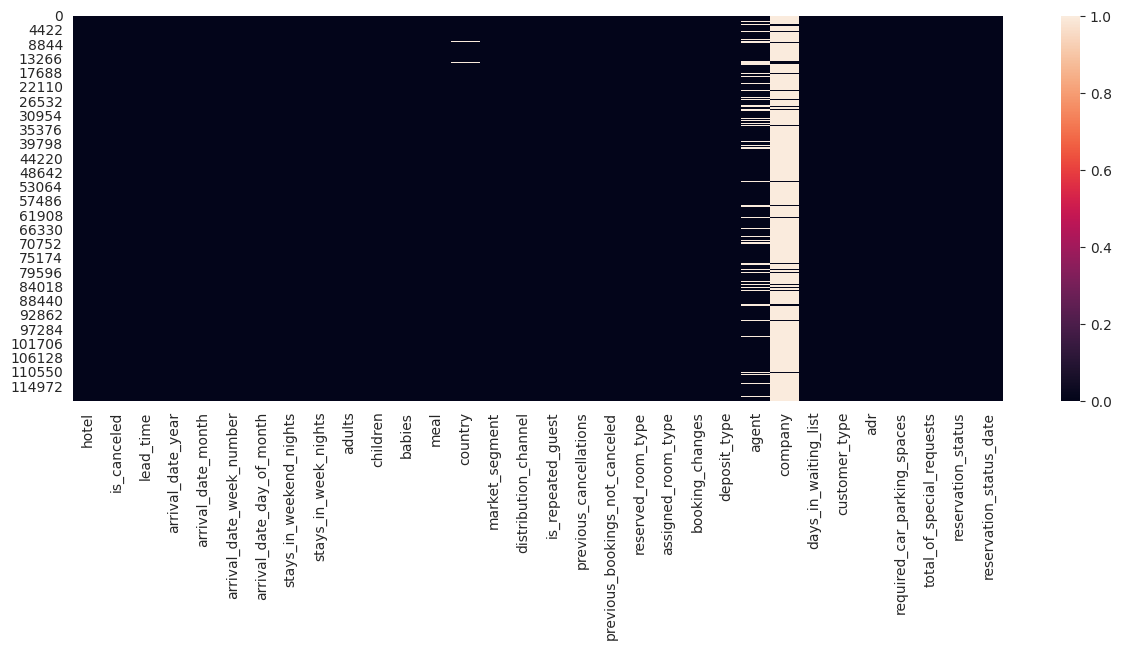

In [ ]:
# Visualising  the missing values using Heat Map

plt.figure(figsize = (15, 5))

sns.heatmap(Hotel_df.isnull())
plt.show()

**What did you know about your dataset?**

This data set contains a single file which compares various booking information between two hotels: a city hotel and a resort hotel.It includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. The dataset contains a total of 119390 rows and 32 columns.Dataset Contains duplicated items i.e 31944 which is removed later.Also it have null values in company , agent , country, children column. Company has extremely large number of null values as compared to other columns.

# **Understanding your variables!**

In [ ]:
# Columns in the  given dataset
column_list = list(Hotel_df.columns)
column_list

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [ ]:
# Statistical analysis of dataset
Hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


# **Description of the variables**

The columns and the data they represent are listed below:

hotel : Name of the hotel (Resort Hotel or City Hotel)

is_canceled : If the booking was canceled (1) or not (0)

lead_time: Number of days before the actual arrival of the guests

arrival_date_year : Year of arrival date

arrival_date_month : Month of month arrival date

arrival_date_week_number : Week number of year for arrival date

arrival_date_day_of_month : Day of arrival date

stays_in_weekend_nights : Number of weekend nights (Saturday or Sunday) spent at the hotel by the guests.

stays_in_week_nights : Number of weeknights (Monday to Friday) spent at the hotel by the guests.

adults : Number of adults among guests

children : Number of children among guests

babies : Number of babies among guests

meal : Type of meal booked

country : Country of guests

market_segment : Designation of market segment

distribution_channel : Name of booking distribution channel

is_repeated_guest : If the booking was from a repeated guest (1) or not (0)

previous_cancellations : Number of previous bookings that were cancelled by the customer prior to the current booking

previous_bookings_not_canceled : Number of previous bookings not cancelled by the customer prior to the current booking

reserved_room_type : Code of room type reserved

assigned_room_type : Code of room type assigned

booking_changes : Number of changes/amendments made to the booking

deposit_type : Type of the deposit made by the guest

agent : ID of travel agent who made the booking

company : ID of the company that made the booking

days_in_waiting_list : Number of days the booking was in the waiting list

customer_type : Type of customer, assuming one of four categories

adr : Average Daily Rate, as defined by dividing the sum of all lodging transactions by the total number of staying nights

required_car_parking_spaces : Number of car parking spaces required by the customer

total_of_special_requests : Number of special requests made by the customer

reservation_status : Reservation status (Canceled, Check-Out or No-Show)

reservation_status_date : Date at which the last reservation status was updated

# **Checking Unique Values.**

In [ ]:
# Check Unique Values for each variable.
print(Hotel_df.apply(lambda col: col.unique()))

hotel                                                    [Resort Hotel, City Hotel]
is_canceled                                                                  [0, 1]
lead_time                         [342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68...
arrival_date_year                                                [2015, 2016, 2017]
arrival_date_month                [July, August, September, October, November, D...
arrival_date_week_number          [27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3...
arrival_date_day_of_month         [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
stays_in_weekend_nights           [0, 1, 2, 4, 3, 6, 13, 8, 5, 7, 12, 9, 16, 18,...
stays_in_week_nights              [0, 1, 2, 3, 4, 5, 10, 11, 8, 6, 7, 15, 9, 12,...
adults                            [2, 1, 3, 4, 40, 26, 50, 27, 55, 0, 20, 6, 5, 10]
children                                            [0.0, 1.0, 2.0, 10.0, 3.0, nan]
babies                                                             [0, 1, 2,

In [ ]:
# checking the name of unique hotels
Hotel_df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
# Arrival date months columns
Hotel_df['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [ ]:
# checking unique adults value in the column
Hotel_df['adults'].unique()

array([ 2,  1,  3,  4, 40, 26, 50, 27, 55,  0, 20,  6,  5, 10])

In [ ]:
# checking unique agent type in the column
Hotel_df['agent'].unique()

array([ nan, 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16., 446.,  34.,  78., 139., 252., 270.,
        47., 114., 301., 193., 182., 135., 350., 195., 352., 355., 159.,
       363., 384., 360., 331., 367.,  64., 406., 16

In [ ]:
# Checking unique variable in each column #
for i in column_list:
  print(f"No.of unique value in column {i} is : {Hotel_df[i].nunique()}")

No.of unique value in column hotel is : 2
No.of unique value in column is_canceled is : 2
No.of unique value in column lead_time is : 479
No.of unique value in column arrival_date_year is : 3
No.of unique value in column arrival_date_month is : 12
No.of unique value in column arrival_date_week_number is : 53
No.of unique value in column arrival_date_day_of_month is : 31
No.of unique value in column stays_in_weekend_nights is : 17
No.of unique value in column stays_in_week_nights is : 35
No.of unique value in column adults is : 14
No.of unique value in column children is : 5
No.of unique value in column babies is : 5
No.of unique value in column meal is : 5
No.of unique value in column country is : 177
No.of unique value in column market_segment is : 8
No.of unique value in column distribution_channel is : 5
No.of unique value in column is_repeated_guest is : 2
No.of unique value in column previous_cancellations is : 15
No.of unique value in column previous_bookings_not_canceled is : 73

# **Data Wrangling/Manipulation**

**Dropping Duplicate values**

In [ ]:
# Dropping the duplicate values
Hotel_df.drop_duplicates(inplace=True)
Hotel_df.reset_index(drop=True, inplace=True)
print(f"there are total {Hotel_df.shape[0]} rows and {Hotel_df.shape[1]} columns in the dataset")

there are total 87396 rows and 32 columns in the dataset


In [ ]:
# count of duplicate values
print(f'Total number of duplicate values : {Hotel_df.duplicated().sum()}')

Total number of duplicate values : 0


# **Replacing Null Values**

In [ ]:
# dropping the 'company' column as it has a lot of missing values
Hotel_df.drop(columns = ['company'], inplace = True)

In [ ]:
# Fill missing values in 'children' column with 0
Hotel_df['children'].fillna(0, inplace=True)

/tmp/ipython-input-2027290575.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Hotel_df['children'].fillna(0, inplace=True)


In [ ]:
# Replacing the missing value in "agent" column with '0' as the missing value may usualy mean that there is no agent involved in such  boolings.
Hotel_df.fillna({'agent' : 0 }, inplace = True)
Hotel_df['agent'].unique()

array([  0., 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16., 446.,  34.,  78., 139., 252., 270.,
        47., 114., 301., 193., 182., 135., 350., 195., 352., 355., 159.,
       363., 384., 360., 331., 367.,  64., 406., 16

In [ ]:
# Replacing the missing values in column "country" with "Others"
Hotel_df.fillna({'country' : 'Others' }, inplace = True)
Hotel_df['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'Others', 'ROU', 'NOR',
       'OMN', 'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA',
       'NLD', 'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN',
       'MOZ', 'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR',
       'UKR', 'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU',
       'TUR', 'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA',
       'KOR', 'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN',
       'GEO', 'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY',
       'KWT', 'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN',
       'LBN', 'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM',
       'MKD', 'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS',
       'COM', 'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI',
       'SAU', 'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU',
       'MDG', 'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI',
       'STP', 'KNA

In [ ]:
Hotel_df.shape

(87396, 31)

In [ ]:
# Null values/missing values count
null_value_count = Hotel_df.isnull().sum().sort_values(ascending=False)

# print only the columns which have  null values
null_value_count = null_value_count[null_value_count > 0]
print(f"Total number of columns with null values : {len(null_value_count)}")

Total number of columns with null values : 0


In [ ]:
# changing the datatype of  the "children" and 'agent' to "int64"
Hotel_df[["children", "agent"]].astype("int64")

,children,agent
0,0,0
1,0,0
2,0,0
3,0,304
4,0,240
...,...,...
87391,0,394
87392,0,9
87393,0,9
87394,0,89


In [ ]:
Hotel_df["cancellation_status"] = np.where(Hotel_df["is_canceled"] == 1, "Cancelled", "Not Cancelled")
Hotel_df["cancellation_status"]

,cancellation_status
0,Not Cancelled
1,Not Cancelled
2,Not Cancelled
3,Not Cancelled
4,Not Cancelled
...,...
87391,Not Cancelled
87392,Not Cancelled
87393,Not Cancelled
87394,Not Cancelled


In [ ]:
Hotel_df["is_repeated_status"] = Hotel_df["is_repeated_guest"].apply(lambda x: "Repeated" if x == 1 else "Not Repeated")
Hotel_df["is_repeated_status"]

,is_repeated_status
0,Not Repeated
1,Not Repeated
2,Not Repeated
3,Not Repeated
4,Not Repeated
...,...
87391,Not Repeated
87392,Not Repeated
87393,Not Repeated
87394,Not Repeated


# **Addition of new columns**

In [ ]:
Hotel_df["total_stay_in_nights"] = Hotel_df["stays_in_week_nights"] + Hotel_df["stays_in_weekend_nights"]
Hotel_df["total_stay_in_nights"]

,total_stay_in_nights
0,0
1,0
2,1
3,1
4,2
...,...
87391,7
87392,7
87393,7
87394,7


In [ ]:
Hotel_df["total_revenue"] = Hotel_df["adr"] * Hotel_df["total_stay_in_nights"]
Hotel_df["total_revenue"]

,total_revenue
0,0.00
1,0.00
2,75.00
3,75.00
4,196.00
...,...
87391,672.98
87392,1578.01
87393,1103.97
87394,730.80


**What Manipulation have you done and insights you found?**

1)Dropping duplicates : There were total number of duplicate values was 31994 . So first we have dropped these duplicates to clean the data. Now number of rows are after removing duplicates are 87396.

2)Handling Null Values: 'children', 'country', 'agent', and 'company'. These are the column with null values and droping the company coloumn as it has highest null values

Then replacing null values in agent column with 0 assuming those rooms were booked without company/agent

Then I have filled null values in children column with 0 as there are only 4 missing values ,assuming that family had 0 children.

Replacing null values in the country column with 'others'to avoid confusion.

3) There are some rows with total number of adults, children or babies equal to zero , this means there is no any booking were made . So we have removed 166 rows having with 0 in adult ,babies and children coloumn

4)Childern & agent column datatype was float but it contains only int value,so change datatype as int64.

5)for our understanding, in column 'is_canceled' we will replace the value from (0,1) to not_canceled, is canceled and same done for 'is_repeated_guest' column

6)There are few columns required in Data to analysis purpose which is created from the given columns.

Total Guests: This columns will help us to evaluate the volumes of total guest and revenue as well. We get this value by adding total no. of Adults, Children & babies.

# **Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

In [ ]:
Hotel_wise_cancellation_no = Hotel_df.groupby("hotel")["cancellation_status"].value_counts().reset_index(name = "count")
Hotel_wise_cancellation_no

,hotel,cancellation_status,count
0,City Hotel,Not Cancelled,37379
1,City Hotel,Cancelled,16049
2,Resort Hotel,Not Cancelled,25992
3,Resort Hotel,Cancelled,7976


In [ ]:
# Checking revenue for each hotel
Hotel_wise_revenue = Hotel_df.groupby("hotel")["total_revenue"].sum().reset_index()
Hotel_wise_revenue

,hotel,total_revenue
0,City Hotel,18774101.54
1,Resort Hotel,15686837.77


In [ ]:
hotel_counts = Hotel_df['hotel'].value_counts()
hotel_counts

,count
hotel,
City Hotel,53428
Resort Hotel,33968


In [ ]:
Hotel_df["total_guests"] = Hotel_df["adults"] + Hotel_df["children"] + Hotel_df["babies"]
Hotel_wise_total_guests = Hotel_df.groupby("hotel")["total_guests"].sum().reset_index()
Hotel_wise_total_guests

,hotel,total_guests
0,City Hotel,107685.0
1,Resort Hotel,69314.0


# **Chart 1**
Which type of hotel is preffered by guests resort or city ?

In [ ]:
# count occurence of each hotel type in hotel column
hotel_counts = Hotel_df['hotel'].value_counts()

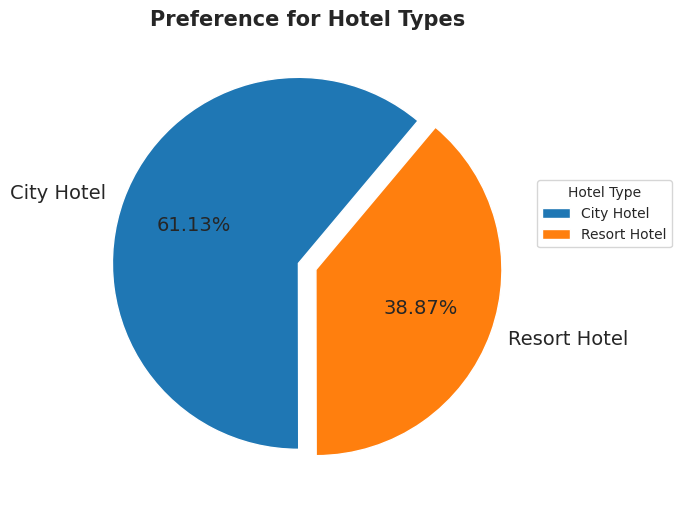

In [ ]:
# visualize the data
# Plot a pie chart
plt.figure(figsize = (6,7))
plt.pie(hotel_counts, labels=hotel_counts.index, autopct='%1.2f%%', startangle=50, explode=[0.05, 0.05], textprops={'fontsize': 14})
plt.title('Preference for Hotel Types', fontsize=15, fontweight='bold')
plt.legend(title='Hotel Type',bbox_to_anchor=(1.3, 0.7))

# display the pie chart
plt.show()

**1. Why did you pick the specific chart?**

Pie chart helps in comparision of data and also it shows the fractional part of whole.

**2. What is/are the insight(s) found from the chart?**

As per the pie chart mentioned above out of total booking 61.44% bookings  are made for "City Hotel"  however the "Resort  Hotel" received only 38.56%. This  data tells us  that the "City Hotel" is preferred over "Resort Hotel" which  has many  reasons such reservation for business trip  and for connectivity from the nearby Airport , Railway stations etc. Whereas "Resort Hotel" receives bookings mostly for leisure trips.

**3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.**

Gained sights helped in creating positive business impact as in city hotel it can provide more services to increase their revenue. In resort hotel it can improve thier services to attract more customers. The company can run targetted campaigns to get more bookings  for each hotel.

# **Chart 2**
What is the percentage of cancellation?

In [ ]:
# count of canceled and non-canceled bookings
cancel_count = Hotel_df['cancellation_status'].value_counts()

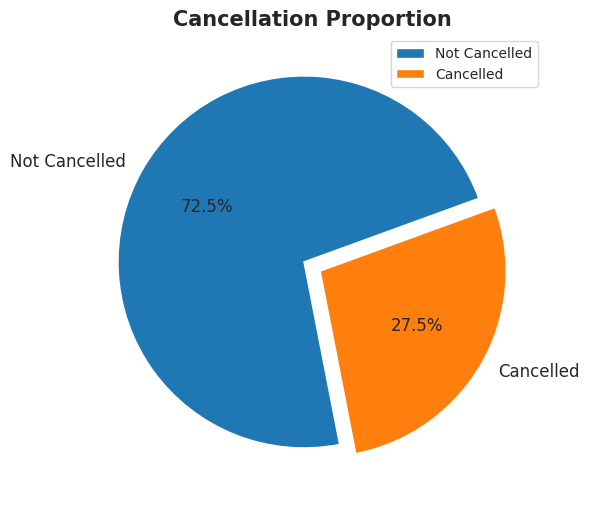

In [ ]:
# visualize the data
# Plotting a pie chart
plt.figure(figsize = (6,7))
plt.pie(cancel_count, labels=cancel_count.index, autopct='%1.1f%%', startangle=20, explode=[0.05, 0.05], textprops={'fontsize': 12})
plt.title('Cancellation Proportion', fontsize=15, fontweight='bold')
plt.legend()
# display the pie chart
plt.show()

**1. Why did you pick the specific chart?**

This chart shows the cancellation rate of the hotels booking.

**2. What is/are the insight(s) found from the chart?**

Guests who cancelled are around 27.6% and those who not cancelled are 72.4%, Which means that the proportions  of cancellation is  less than that of Not  cancelled.

3. Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

Around 72.5% guests didnt cancel their booking so, its a positve impact on hotel. Cancellation rate is 27.5% , from business persecptive cancellation rate is quite high. We need to findout the reason of cancellation by taking feedback from guest.

# Chart - 3

Which Hotel received more cancellations?

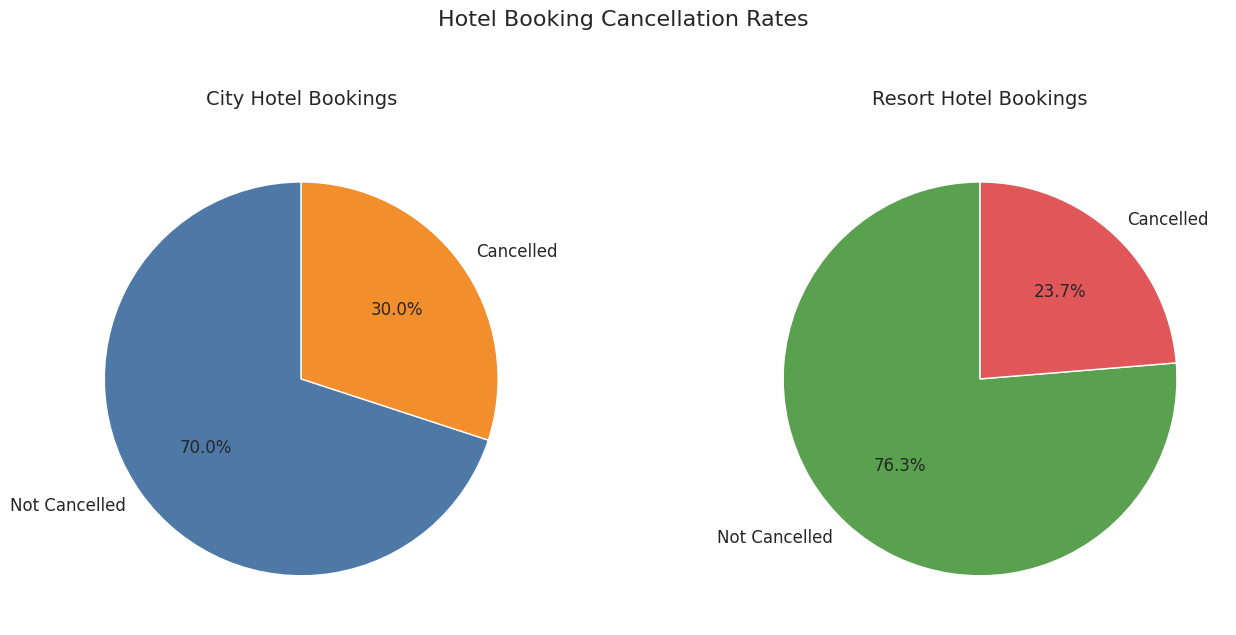

In [ ]:
import matplotlib.pyplot as plt

# Data
data = {'City Hotel': {'Not Cancelled': 37377,'Cancelled': 16045},'Resort Hotel': {'Not Cancelled': 25576,'Cancelled': 7946}}

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# City Hotel Pie Chart
ax1.pie(
    data['City Hotel'].values(),
    labels=data['City Hotel'].keys(),
    autopct='%1.1f%%',
    colors=['#4e79a7', '#f28e2b'],
    startangle=90,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1},
    textprops={'fontsize': 12}
)
ax1.set_title('City Hotel Bookings', fontsize=14, pad=20)

# Resort Hotel Pie Chart
ax2.pie(
    data['Resort Hotel'].values(),
    labels=data['Resort Hotel'].keys(),
    autopct='%1.1f%%',
    colors=['#59a14f', '#e15759'],
    startangle=90,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1},
    textprops={'fontsize': 12}
)
ax2.set_title('Resort Hotel Bookings', fontsize=14, pad=20)

# Super title
fig.suptitle('Hotel Booking Cancellation Rates', fontsize=16, y=1.05)

# Adjust layout and display
plt.tight_layout()
plt.show()


**1. Why did you pick the specific chart?**

This visualization allows for easy comparison between cancellation rates of the two hotel types while maintaining each hotel's individual data integrity. The side-by-side presentation makes it simple to compare

**2. What is/are the insight(s) found from the chart?**

1. City Hotel has a higher cancellation rate (30.0%) compared to Resort Hotel (23.7%)
2. Both hotels have a majority of not-cancelled bookings

**3. Will the gained insights help creating a positive business impact?**

**Are there any insights that lead to negative growth? Justify with specific reason.**

1. Resort Hotel is doing better in terms of cancellation which can be  further improved using the feedbacks from the customer.
2. City hotels are also doing  good as approximately 70% bookings are not  cancelled. However it also need immediate attention to reduce the cancellation rate.
3. Both the hotels are doing good customer feedback and hotel policy need to be looked after to reduce the  cancellation rate.

# Chart - 4
What is most preferred room type by guests?

In [ ]:
# count of room type booked by guest
room_count= Hotel_df['assigned_room_type'].value_counts()
room_count

,count
assigned_room_type,
A,46313
D,22432
E,7195
F,3627
G,2498
C,2165
B,1820
H,706
I,357


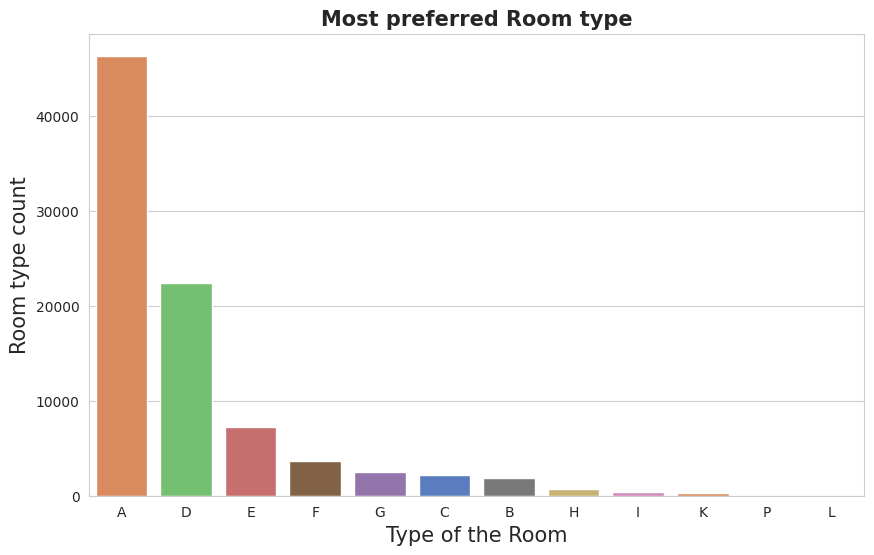

In [ ]:
# visualise the data
plt.figure(figsize= (10,6))

sns.countplot(x='assigned_room_type', data=Hotel_df, order=room_count.index, hue='assigned_room_type', palette='muted', legend=False)

plt.title("Most preferred Room type", fontsize=15, fontweight='bold')
plt.xlabel('Type of the Room', fontsize=15)
plt.ylabel('Room type count', fontsize=15)

plt.show()

1. Why did you pick the specific chart?

I have choose countplot to visualize most prefferd roomtype because countplot display the count of each observation for each category and here we have to represent room type vs room type count.

2. What is/are the insight(s) found from the chart?

The insighte found from the chart is A type rooms are most prefered rooms and the count is 46151 and after that D type rooms are prefered by the guest and count is 22278.

Least preffered room is K and L. K type room is preffered by only 185 and only 1 guest has booked L type room.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

A type rooms are most preferred rooms. This make positive impact on business. H,I,K,L type rooms are less preferred this insight makes neative impact. This is beacause type A rooms have 46283 bookings anf type L room has only one booking.

# Chart - 5
Which agent made the most bookings?

In [ ]:
# count top 10 agent with most bookings
top_agent= Hotel_df['agent'].value_counts().reset_index().rename(columns={'index':'agent','agent':'num_of_bookings'})[:10]
# rename column name for better understanding
top_agent

,num_of_bookings,count
0,9.0,28759
1,240.0,13028
2,0.0,12193
3,14.0,3349
4,7.0,3300
5,250.0,2779
6,241.0,1644
7,28.0,1502
8,8.0,1383
9,1.0,1232


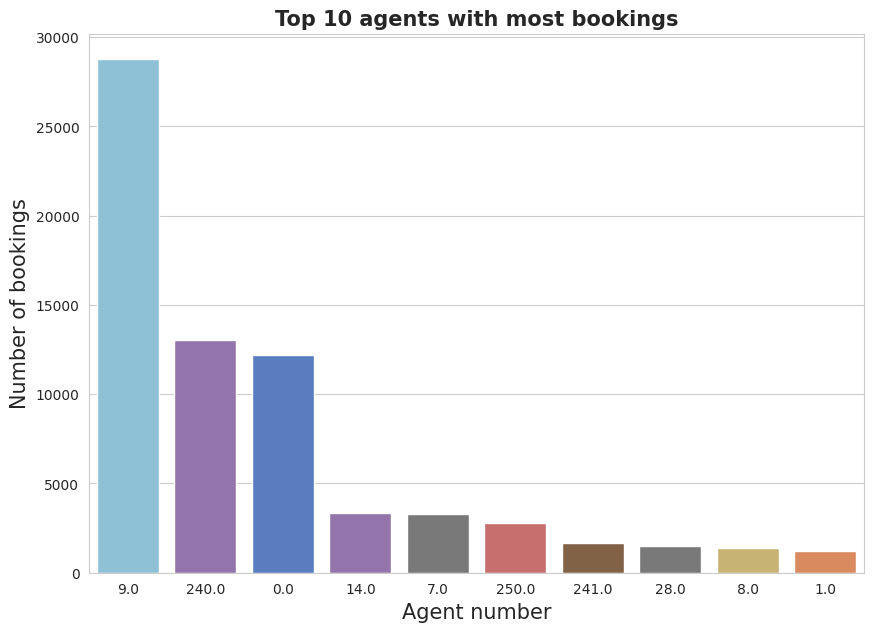

In [ ]:
# visualize the data

plt.figure(figsize=(10,7))
sns.countplot(x='agent', data= Hotel_df, order=  Hotel_df['agent'].value_counts().index[:10], hue='agent', palette='muted', legend=False)

plt.title('Top 10 agents with most bookings', fontsize=15, fontweight='bold')
plt.ylabel('Number of bookings', fontsize=15)
plt.xlabel('Agent number', fontsize=15)

plt.show()

1. Why did you pick the specific chart?

I choose barplot here because it helps easy comparison of data and can be visulaised clearly.

2. What is/are the insight(s) found from the chart?

As per the data Agent no. 9 made most of the bookings followed by Agent No.- 240. Bookings without any agent is at the  third position.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, Agent no.9 and 240 has more bookins which makes positive impact.**

Agent no. 1 and 6 has less bookins which makes neative impact.**

Booking made by agent no 1 and 6 are about 4.27% of agent no 9 which has highest bookings.

# Chart - 6
**Which distribution channel is mostly used for hotel booking?**

In [ ]:
# count of occurences of each distribution channel
distribution_channel = Hotel_df['distribution_channel'].value_counts()
distribution_channel

,count
distribution_channel,
TA/TO,69141
Direct,12988
Corporate,5081
GDS,181
Undefined,5


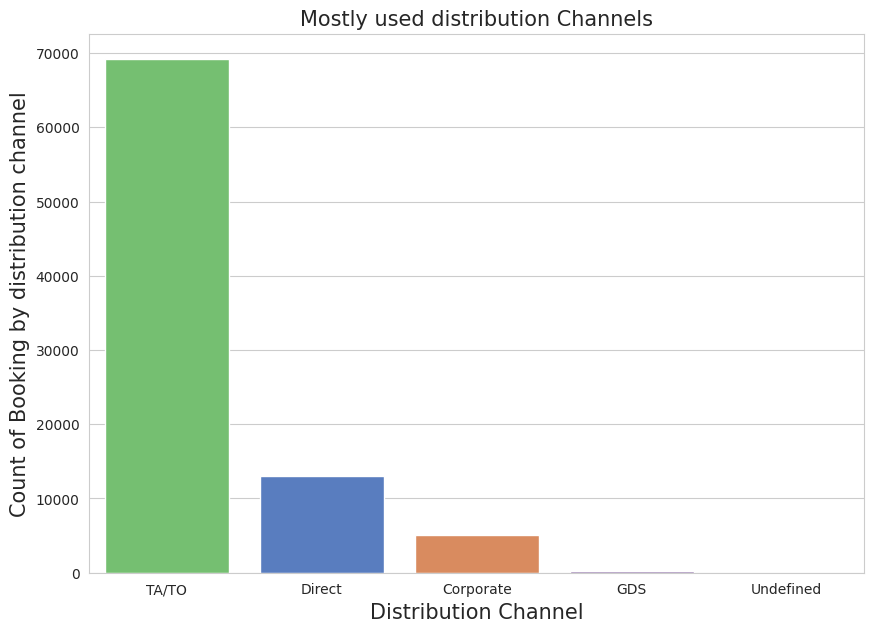

In [ ]:
#Visualization
plt.figure(figsize=(10,7))

sns.countplot(x='distribution_channel', data = Hotel_df, order=distribution_channel.index, hue='distribution_channel', palette='muted', legend=False)

plt.title("Mostly used distribution Channels", fontsize=15)
plt.xlabel('Distribution Channel', fontsize=15)
plt.ylabel('Count of Booking by distribution channel', fontsize=15)
plt.show()

**1. Why did you pick the specific chart?**

The given chart represents maximum volume of booking done through which channel to represnt the numbers in descending .

**2. What is/are the insight(s) found from the chart?**

The  TA/TO channel is mostly used for hotel booking followed by direct bookings.

**3. Will the gained insights help creating a positive business impact?**

**Are there any insights that lead to negative growth? Justify with specific reason.**

Distribution channel TA/TO is mostly used channel this makes positive impact.

Distribution channel GDS and undefined is less used channels this makes negative impact.

Use of TA/TO is 79.13% and use of GDS is 0.21%.**

Other channels can provide those facilities which are provided by TA/TO channel.

# Chart -7

From which country most of the guests are coming?

In [ ]:
# Count occurrences of top 10 country in the country column
top_ten_country = Hotel_df['country'].value_counts().reset_index()[:10]
top_ten_country

,country,count
0,PRT,27453
1,GBR,10433
2,FRA,8837
3,ESP,7252
4,DEU,5387
5,ITA,3066
6,IRL,3016
7,BEL,2081
8,BRA,1995
9,NLD,1911


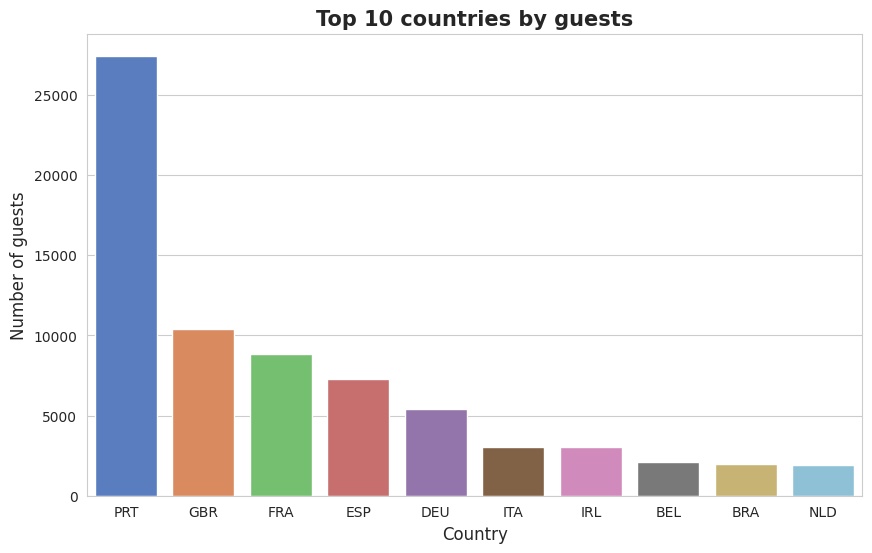

In [ ]:
# Visualizing by  plotting the graph

plt.figure(figsize=(10,6))

sns.barplot(x='country', y='count', data=top_ten_country, palette='muted', hue='country', dodge=False)
plt.legend([],[], frameon=False)  # Disable the legend

plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of guests', fontsize=12)
plt.title("Top 10 countries by guests", fontsize=15, fontweight='bold')

plt.show()

**1. Why did you pick the specific chart?**

Bar plots are effective for comparing numerical values, such as the number of guests in this case

**2. What is/are the insight(s) found from the chart?**

Most of the guests are coming from portugal i.e more than 25000 guests are from portugal.

**3. Will the gained insights help creating a positive business impact?**

**Are there any insights that lead to negative growth? Justify with specific reason.**

This data can be used for attracting the remaining people of Portugal and other neighbouring contries, some schemes may be introduced or social media awareness, advertising may be increased to get more customers from nearby areas.

Feedback gathered from these guests may be used to increase guests from other countries too and strategies may be planned according to this.

abbrevations for countries-

PRT- Portugal

GBR- United Kingdom

FRA- France

ESP- Spain

DEU - Germany

ITA -Itlay

IRL - Ireland

BEL -Belgium

BRA -Brazil

NLD-Netherlands

# **BIVARIATE ANALYSIS and MULTIVARIATE ANALYSIS**

# Chart -8
**Which year has highest number of bookings?**

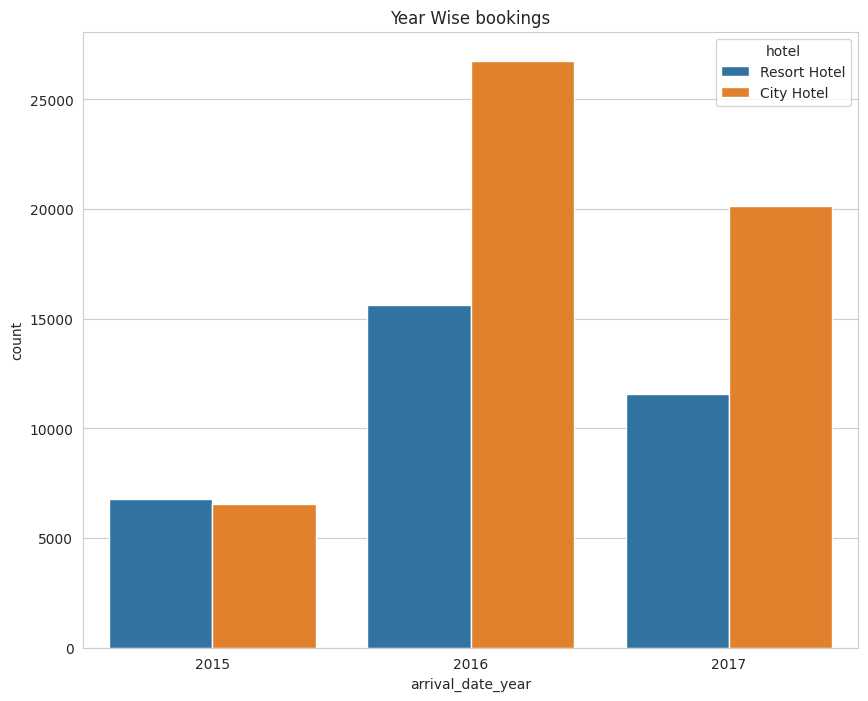

In [ ]:
# set plot size
plt.figure(figsize=(10,8))
# plot with countplot
sns.countplot(x = Hotel_df['arrival_date_year'], hue = Hotel_df['hotel'])
plt.title("Year Wise bookings")
plt.show()

1. Why did you pick the specific chart?

Because countplot is easy to understand and and it shows clear comparison

2. What is/are the insight(s) found from the chart?

2016 had highest bookings and 2015 had lowest bookings.

**3. Will the gained insights help creating a positive business impact?**

**Are there any insights that lead to negative growth? Justify with specific reason.**

For Resort hotel in year 2015 it was with least number of bookings and in 2016 it increased but in 2017 it again decreased , it means they have to find out the reasons for this using feedback of guest. For City hotel in year 2015 it was the lowest and in 2016 it was on peak and again it decreased in booking in 2017

# Chart - 9
What is ADR accross different months?

In [ ]:
#  Using groupby funtion
bookings_by_months_df = Hotel_df.groupby(['arrival_date_month', 'hotel'])['adr'].mean().reset_index()

# Create month list
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# It will take the order of the month list in the dataframe along with values
bookings_by_months_df['arrival_date_month'] = pd.Categorical(bookings_by_months_df['arrival_date_month'], categories = months, ordered = True)

# Sorting values
bookings_by_months_df = bookings_by_months_df.sort_values('arrival_date_month')

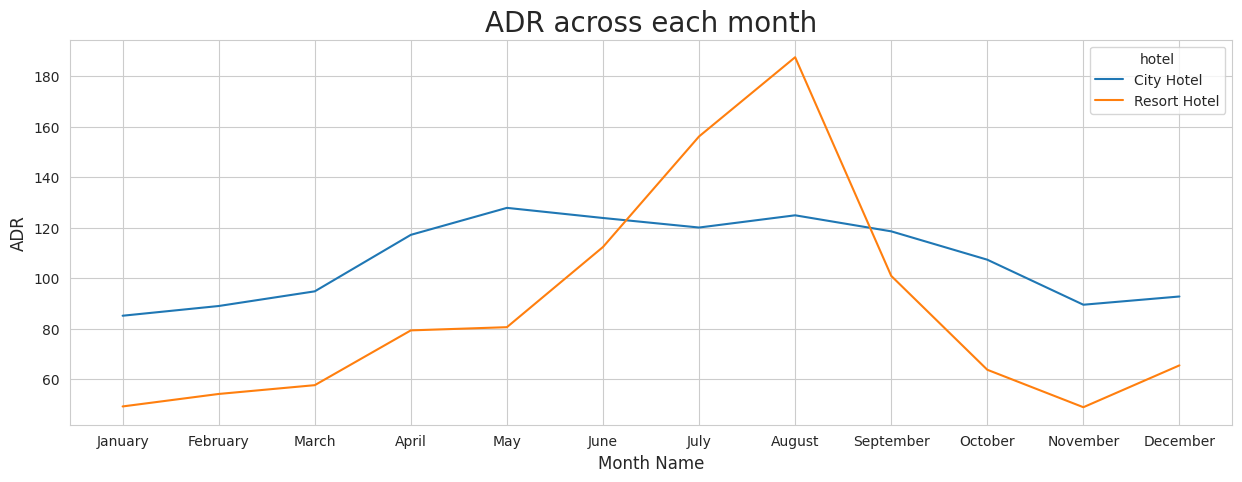

In [ ]:
# Setting the chart size
plt.figure(figsize=(15,5))

# Plotting the values in a line chart
sns.lineplot(x=bookings_by_months_df['arrival_date_month'], y=bookings_by_months_df['adr'], hue=bookings_by_months_df['hotel'])

# Setting the labels and title
plt.title('ADR across each month', fontsize=20)
plt.xlabel('Month Name', fontsize=12)
plt.ylabel('ADR', fontsize=12)

# Show chart
plt.show()

**1. Why did you pick the specific chart?**

I have used line plot in this case because it effectively shows the trend of ADR over time

**2. What is/are the insight(s) found from the chart?**

City Hotel : It is clear that City Hotel generates more revenue in May months in comparison to other months.

Resort Hotel : Resort Hotel generates more revenue in between July and August months.

**3. Will the gained insights help creating a positive business impact?**

**Are there any insights that lead to negative growth? Justify with specific reason.**

As per the  data City Hotel generates more revenue in May and Resort Hotel generates more revenue between July and August, hotels can focus marketing , promotions, and special offer to attract more guests during these peak months.

# Chart - 10
Which month has the most bookings in each hotel type?

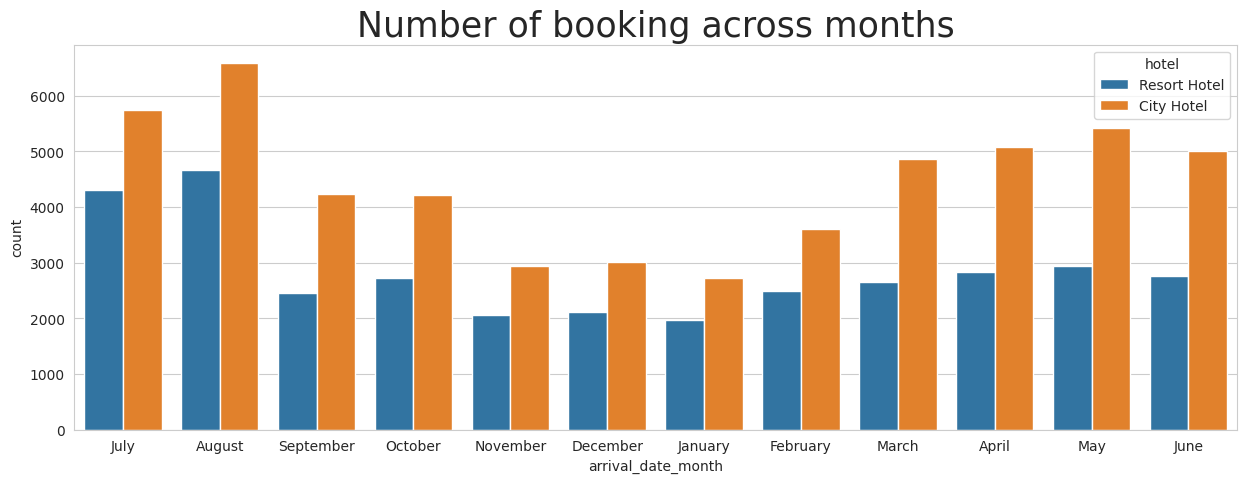

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x = Hotel_df['arrival_date_month'],hue = Hotel_df['hotel'])
plt.title("Number of booking across months", fontsize = 25)
plt.show()

**1. Why did you pick the specific chart?**

Count plots are used when you want to compare the counts of different categories. In this case, it allows us to visually compare the number of bookings made for each month by hotel type

**2. What is/are the insight(s) found from the chart?**

The highest number of bookings appear to be in July and August. Lowest booking months: December, January and February appear to be the months with the fewest bookings.

**3. Will the gained insights help creating a positive business impact?**

**Are there any insights that lead to negative growth? Justify with specific reason.**

There is negative insight but hotel can use this insight to arrange everything in advance and welcome their guest in the best way possible and hotel can also run some promotional offer in these 2 months to attract more guests.

# **Chart - 11**

Which distribution channel has highest adr?

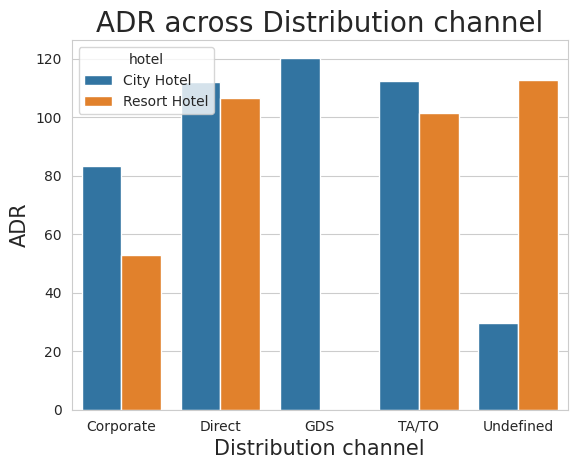

In [ ]:
# Grouping dist_channel and hotels on their adr
distribution_channel = Hotel_df.groupby(['distribution_channel','hotel'])['adr'].mean().reset_index()

# Visualization by using barplot
sns.barplot(x='distribution_channel',y='adr',data = distribution_channel,hue='hotel')
plt.title('ADR across Distribution channel', fontsize=20)
plt.xlabel('Distribution channel',fontsize=15)
plt.ylabel('ADR', fontsize=15)
dist_channel_adr = Hotel_df.groupby(['distribution_channel','hotel'])['adr'].mean().reset_index()

**1. Why did you pick the specific chart?**

I use here barplot to visualise ADR across distribution channel beacuse it give easy to undertand visualization to large data.

**2. What is/are the insight(s) found from the chart?**

The insight find from the above chart is that GDS channel contributed most in ADR in city hotel and Direct and TA/TO has nearly equal contribution in adr in both hotel types.

**3. Will the gained insights help creating a positive business impact?**

**Are there any insights that lead to negative growth? Justify with specific reason.**

GDS distribution channel contributed more to adr for city hotel

Undefined distribution channel contributed more to adr for resort hotel this makes positive impact.

GDS distribution channel has no any contribution to adr for resort hotel and undefined distribution channel contributed less to adr for city hotel this makes neative impact.

# Chart - 12

Pair Plot

<Figure size 1000x800 with 0 Axes>

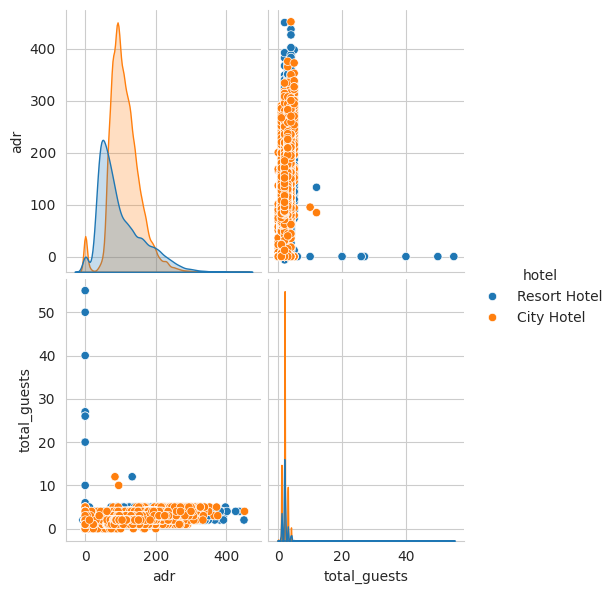

In [ ]:
# Pair Plot visualization code
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
sns.pairplot(data = Hotel_df[Hotel_df['adr']<500][['hotel','adr', 'total_guests']],height = 3,aspect = 0.8, hue ='hotel')
plt.show()

**1. Why did you pick the specific chart?**

A pairs plot allows us to see both distribution of single variables and relationships between two variables .It is also a great method to identify trends for follow-up analysis.

**2. What is/are the insight(s) found from the chart?**

Here we can see that For City hotel ADR is maximum if we compare with resort hotel, and ADR is also increases as number of people is less (<=5). If number of of people will increase they tends to book Resort Hotel.

# Chart - 13

Correlation Heatmap

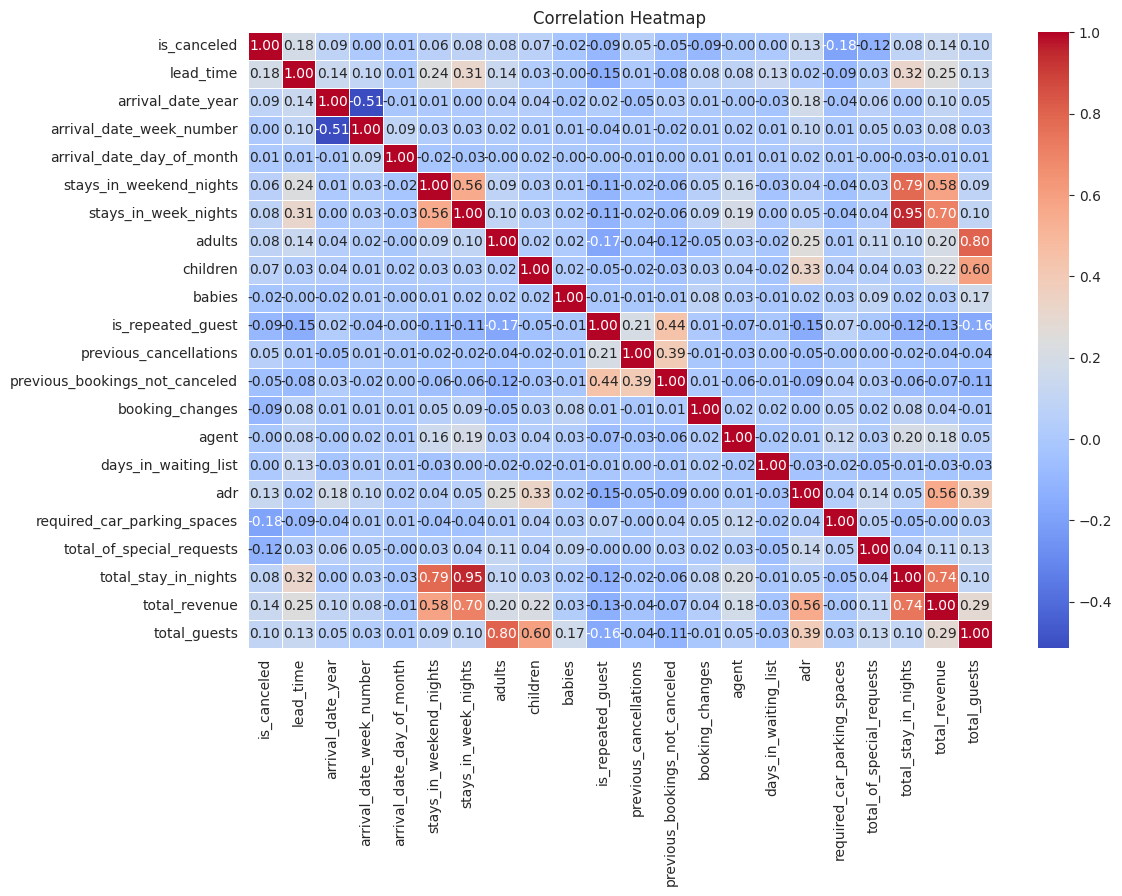

In [ ]:
numeric_columns = Hotel_df.select_dtypes(include=['int64', 'float64']).columns

# Calculating the correlation matrix
correlation_matrix = Hotel_df[numeric_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**1. Why did you pick the specific chart?**

choosing a heatmap to visualize the correlation matrix because it is an effective way to represent the relationships between multiple numeric variables in a dataset. Heatmaps provide a clear, intuitive visual representation of how variables correlate with each other, with color gradients indicating the strength and direction (positive or negative) of these correlations.

**2. What is/are the insight(s) found from the chart?**

Total Stay in Nights is a central variable, highly correlated with both stays in week nights and weekend nights, and strongly influencing revenue. Revenue is significantly influenced by ADR, total stay in nights, and total guests. Variables like lead time and previous cancellations show little to no correlation with most other variables, indicating their limited impact on other factors.

# **Chart - 14**

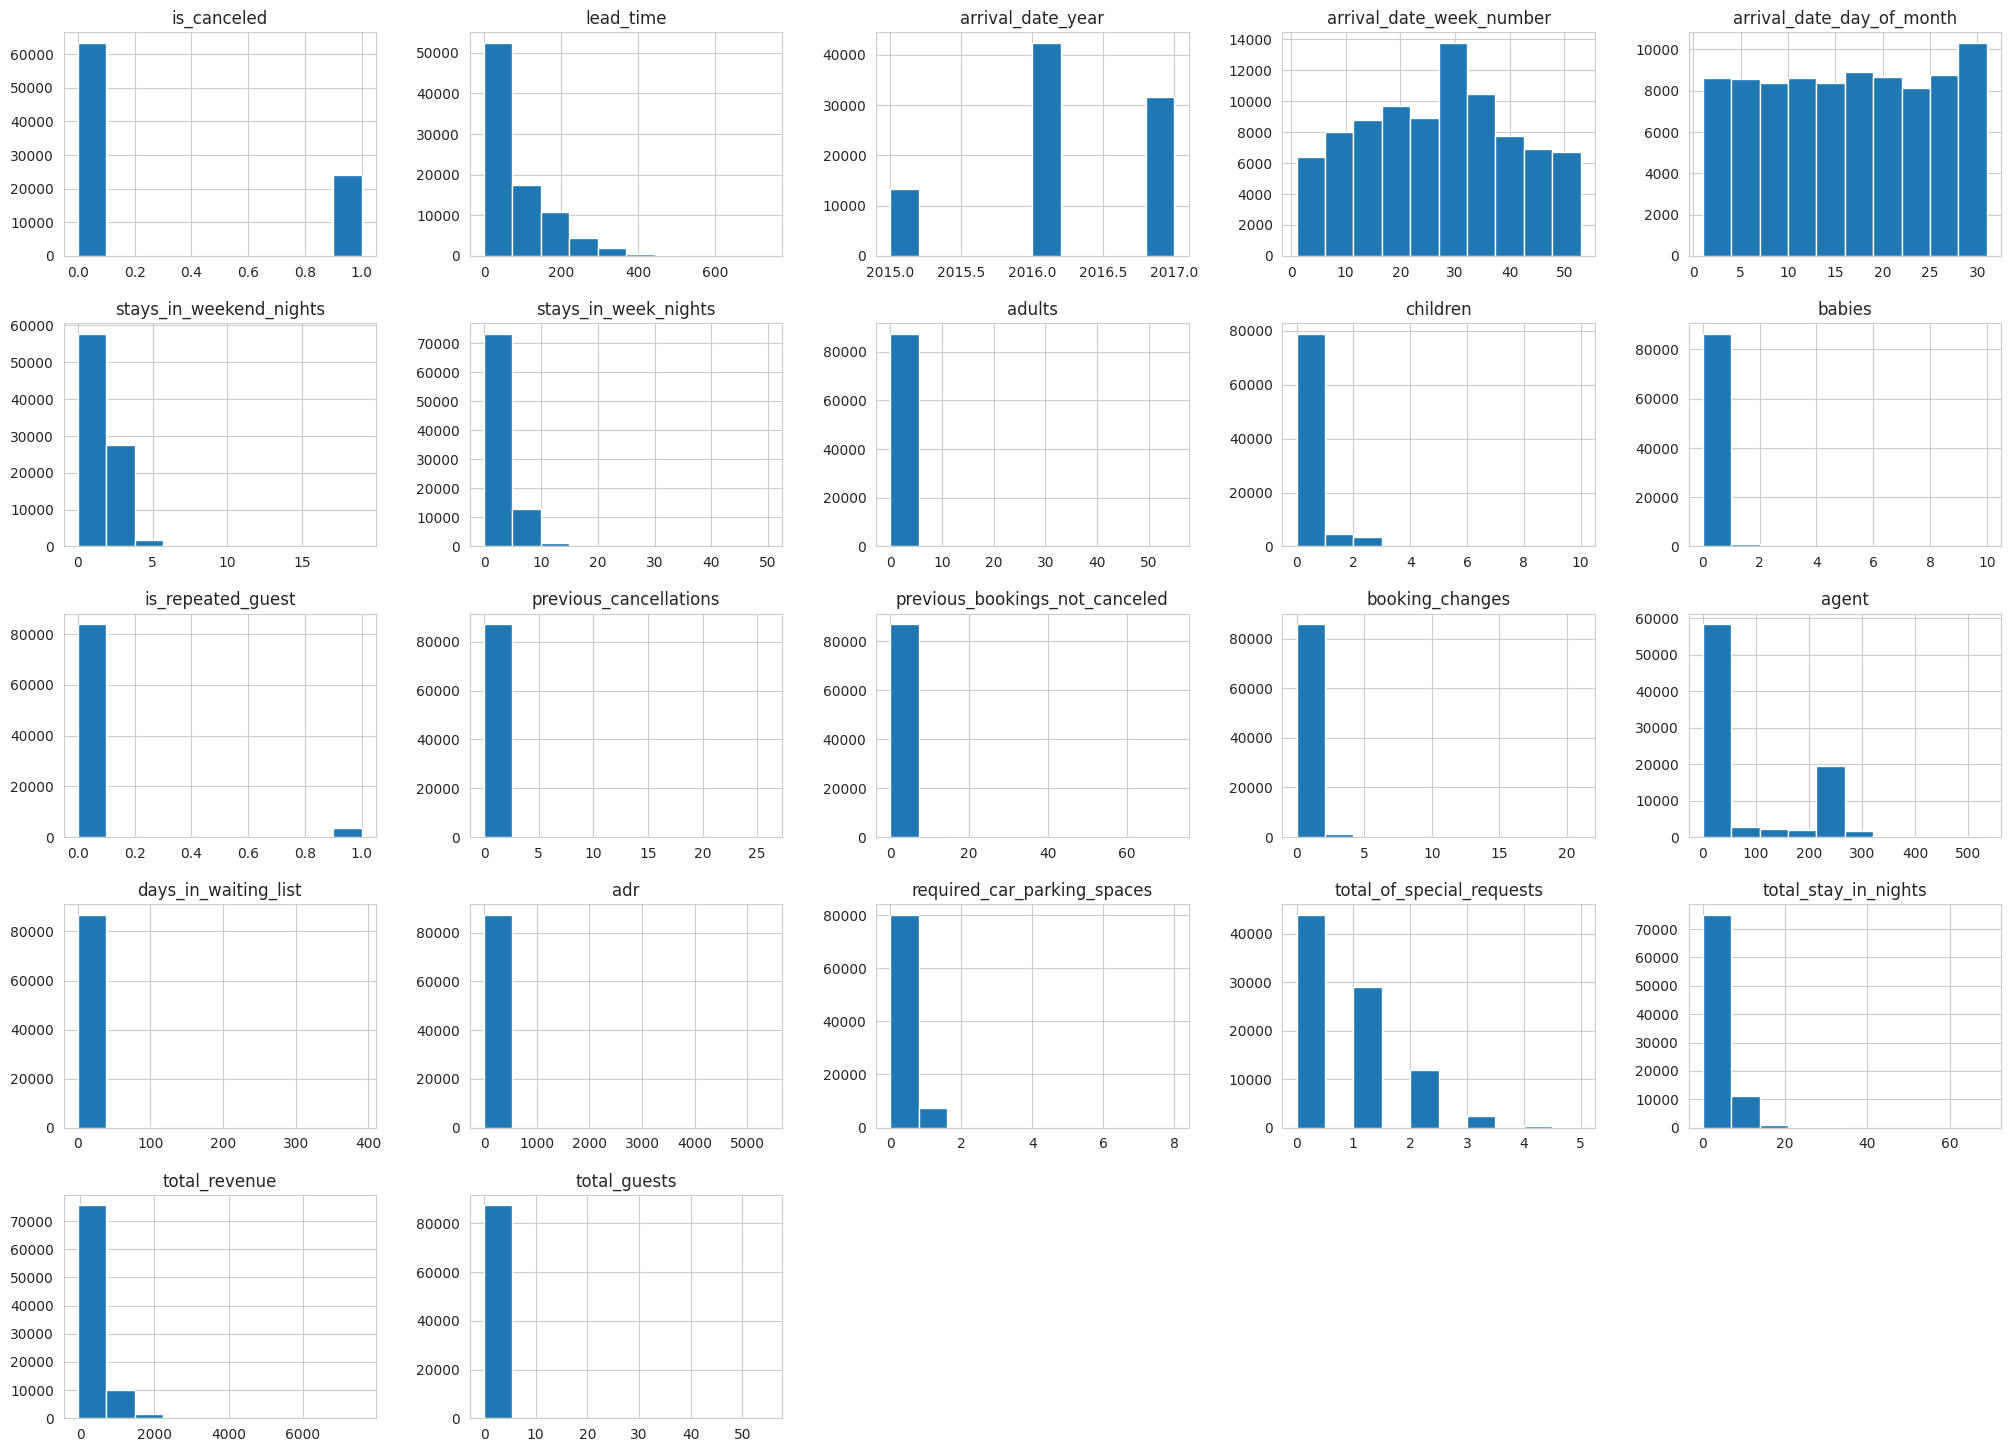

In [ ]:
# Plotting Histogram
Hotel_df.hist(figsize = (25, 18))
plt.show()

**1. Why did you pick this chart?**

I used Histogram because  it effectively shows the distribution of numerical data and also popular tool to summarize the data

2. What is/are the insight(s) found from the  chart?

The Histogram reveals the spread and central tendancy of various features, indentifies skewness, and highlights potential owners.

# **5. Solution to Business Objective**

# **What do you suggest the client to achieve Business Objective ?**

Reasons for Booking Cancellations:

They look at reasons like plans changing, finding better deals somewhere else, or not liking something about the booking. By asking guests directly through surveys, hotels can learn exactly why people cancel. This helps hotels make changes to keep more bookings and make guests happier.

Best Time to Book Hotel:

They look at when most people book and how early they do it. By using data to predict when more people will want to book, hotels can change prices to attract more guests. They also offer discounts and deals at times when fewer people usually book to get more guests to come.

Peak Season:

By knowing this, hotels can plan better to have enough staff and rooms available when lots of people want to stay. They also advertise more during these busy times to make more money.

Suggestions to Reduce Cancellations:

Hotels can do things to make fewer people cancel their bookings. They can let guests change or cancel their bookings easily without extra fees. Hotels also need to communicate well with guests before and after they book to make sure guests know what to expect. This helps guests feel more comfortable and less likely to cancel.

Increase Revenue of Hotels: They do this by changing room prices based on how many people want to stay and what other hotels are doing. Hotels also try to sell more things to guests like upgraded rooms or special packages. By working with local businesses, hotels can offer unique deals that attract more guests and make more money.

# **Conclusion**

These are some conclusions that we get after performing EDA.

City hotel is mostly preferred hotel by guests.

Percentage of repeated guest is less which is 3.86%.

Cancellation rate is 27 %.

Mostly preferred food type is BBtype food.

Room type A is mostly preferred room type.

Agent no. 9 made the most bookings.

Most guests are coming from Portugal.

TA/TO distribution channel is mostly used and percentage is 79.13%.

For year 2016 highest bookings were there for both city and resort hotel.

City Hotel generates more revenue in May and Resort Hotel generates more revenue between July and August.

GDS channel contributed most in ADR in city hotel and Direct and TA/TO has nearly equal contribution in adr in both hotel types.

# **Hurrah! You have successfully completed your EDA Capstone Project !!!**